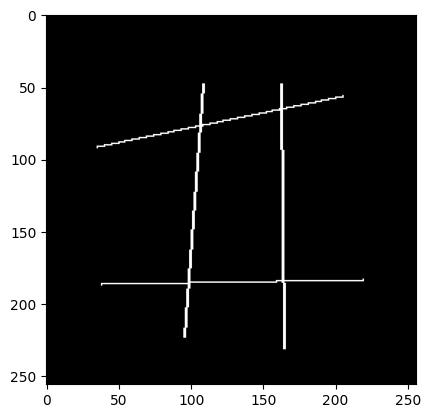

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def generate_image():
    image = Image.new("RGB", (256, 256), "black")
    draw = ImageDraw.Draw(image)

    x1 = np.random.randint(50, 110)
    y1 = np.random.randint(10, 50)

    x2 = np.random.randint(140, 200)
    y2 = np.random.randint(10, 50)

    x3 = np.random.randint(50, 110)
    y3 = np.random.randint(200, 256)

    x4 = np.random.randint(140, 200)
    y4 = np.random.randint(200, 256)

    x5 = np.random.randint(10, 50)
    y5 = np.random.randint(50, 110)

    x6 = np.random.randint(10, 50)
    y6 = np.random.randint(140, 200)

    x7 = np.random.randint(200, 256)
    y7 = np.random.randint(50, 110)

    x8 = np.random.randint(200, 256)
    y8 = np.random.randint(140, 200)

    pair1 = (x1, y1)
    pair2 = (x2, y2)
    pair3 = (x3, y3)
    pair4 = (x4, y4)
    pair5 = (x5, y5)
    pair6 = (x6, y6)
    pair7 = (x7, y7)
    pair8 = (x8, y8)

    draw.line([pair1, pair3], fill="white", width=2)
    draw.line([pair2, pair4], fill="white", width=2)
    draw.line([pair5, pair7], fill="white", width=2)
    draw.line([pair6, pair8], fill="white", width=2)

    line1 = LineString([pair1,  pair3])
    line2 = LineString([pair5, pair7])
    line3 = LineString([pair2, pair4])
    line4 = LineString([pair6, pair8])

    int_pt1 = line1.intersection(line2)
    point_of_intersection1 = int_pt1.x, int_pt1.y

    int_pt2 = line1.intersection(line4)
    point_of_intersection2 = int_pt2.x, int_pt2.y

    int_pt3 = line3.intersection(line2)
    point_of_intersection3 = int_pt3.x, int_pt3.y

    int_pt4 = line3.intersection(line4)
    point_of_intersection4 = int_pt4.x, int_pt4.y

    # point_corner1 = (((x1+x5)/2)/256, ((y1+y5)/2)/256)
    # point_corner2 = (((x2+x7)/2)/256, ((y2+y7)/2)/256)
    # point_corner3 = (((x8+x4)/2)/256, ((y4+y8)/2)/256)
    # point_corner4 = (((x6+x3)/2)/256, ((y3+y6)/2)/256)

    # line2_1 = LineString([pair1, (int_pt3.x, int_pt3.y)])
    # line2_2 = LineString([(int_pt1.x, int_pt1.y), pair2])
    # int_pt_2 = line2_1.intersection(line2_2)
    # point_of_intersection_2 = int_pt_2.x/256, int_pt_2.y/256


    # line4_1 = LineString([pair8, (int_pt3.x, int_pt3.y)])
    # line4_2 = LineString([(int_pt4.x, int_pt4.y), pair7])
    # int_pt_4 = line4_1.intersection(line4_2)
    # point_of_intersection_4 = int_pt_4.x/256, int_pt_4.y/256


    # line6_1 = LineString([pair3, (int_pt4.x, int_pt4.y)])
    # line6_2 = LineString([(int_pt2.x, int_pt2.y), pair4])
    # int_pt_6 = line6_1.intersection(line6_2)
    # point_of_intersection_6 = int_pt_6.x/256, int_pt_6.y/256

    # line8_1 = LineString([pair5, (int_pt4.x, int_pt4.y)])
    # line8_2 = LineString([(int_pt1.x, int_pt1.y), pair6])
    # int_pt_8 = line8_1.intersection(line8_2)
    # point_of_intersection_8 = int_pt_8.x/256, int_pt_8.y/256


    # line9_1 = LineString([(int_pt3.x, int_pt3.y), (int_pt2.x, int_pt2.y)])
    # line9_2 = LineString([(int_pt1.x, int_pt1.y), (int_pt4.x, int_pt4.y)])
    # int_pt_9 = line9_1.intersection(line9_2)
    # point_of_intersection_9 = int_pt_9.x/256, int_pt_9.y/256

    return np.asarray(image), [   int_pt1.x/256, int_pt1.y/256
,int_pt2.x/256, int_pt2.y/256,int_pt3.x/256, int_pt3.y/256, int_pt4.x/256, int_pt4.y/256]

def synthetic_gen_with_labels(batch_size=64):
    while True:
        X = np.zeros((batch_size, 256, 256, 3))
        Y = np.zeros((batch_size, 8)) 

        for i in range(batch_size):
            image, labels = generate_image()
            X[i] = image
            Y[i] = labels

        yield X, Y


x, y = next(synthetic_gen_with_labels())
plt.imshow(x[0])

In [ ]:


base_model = VGG16(input_shape=[256, 256, 3], include_top=False, weights='imagenet')


selected_layers = [layer for layer in base_model.layers if 'block1' in layer.name]


input = base_model.input
x = input
for layer in selected_layers:
    x = layer(x)


x = GlobalAveragePooling2D()(x)  
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)  
x = Dense(18, activation='sigmoid')(x)
x = Reshape((9, 2))(x)


model1 = Model(inputs=input, outputs=x)

for layer in selected_layers:
    layer.trainable = False


model1.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
model1.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 global_average_pooling2d_3   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                           

In [ ]:
EPOCH_SIZE = 16
model1.fit(synthetic_gen_with_labels(),steps_per_epoch=EPOCH_SIZE,epochs=30)

Epoch 1/30
16/16 [==============================] - 131s 8s/step - loss: 0.5419
Epoch 2/30
16/16 [==============================] - 126s 8s/step - loss: 0.4204
Epoch 3/30
16/16 [==============================] - 127s 8s/step - loss: 0.3395
Epoch 4/30
16/16 [==============================] - 127s 8s/step - loss: 0.2780
Epoch 5/30
16/16 [==============================] - 127s 8s/step - loss: 0.2296
Epoch 6/30
16/16 [==============================] - 127s 8s/step - loss: 0.1877
Epoch 7/30
16/16 [==============================] - 128s 8s/step - loss: 0.1530
Epoch 8/30
16/16 [==============================] - 126s 8s/step - loss: 0.1240
Epoch 9/30
16/16 [==============================] - 129s 8s/step - loss: 0.1008
Epoch 10/30
16/16 [==============================] - 127s 8s/step - loss: 0.0814
Epoch 11/30
16/16 [==============================] - 127s 8s/step - loss: 0.0656
Epoch 12/30
16/16 [==============================] - 129s 8s/step - loss: 0.0526
Epoch 13/30
16/16 [==================

2/2 [==============================] - 8s 5s/step


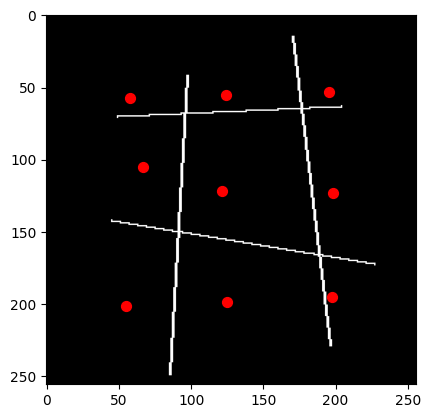

In [ ]:
from matplotlib.patches import Rectangle



x, _ = next(synthetic_gen_with_labels())

pred = model1.predict(x)

im = x[0]
p = pred[0]

fig, ax = plt.subplots(1)
ax.imshow(im)
for i in range(9):

    ax.scatter(p[i][0]*256 , p[i][1]*256 , color='r', marker='o', s=50)  

plt.show()


In [ ]:
p

array([[0.        , 0.04335799],
       [0.43057925, 0.16919458],
       [0.6713538 , 0.07357256],
       [0.0917459 , 0.36162525],
       [0.4672779 , 0.12367339],
       [0.67416245, 0.37010863],
       [0.        , 0.5799687 ],
       [0.44404596, 0.5989811 ],
       [0.5803606 , 0.63411975]], dtype=float32)